# Churn Analysis for a Telecom Dataset from Kaggle

#### <font color='blue'> Done by: Assadullah samir </font>

### Load libraries

In [1]:
### Load The Required libraries:

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from plotnine import *

In [2]:
# Standard plotly imports

import plotly.plotly as py

import plotly.graph_objs as go

from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode

import cufflinks

cufflinks.go_offline(connected=True)

init_notebook_mode(connected=True)

In [84]:
import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [85]:
import warnings
warnings.filterwarnings('ignore')

### Load and Explore the dataset:

The data come from Kaggle; the link ro the dataset is https://www.kaggle.com/becksddf/churn-in-telecoms-dataset. <br>

The dataset has been downloaded and stored in the data folder.

##### Read in Data:

In [4]:
# Read data to a pandas dataframe

df = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')

In [5]:
# First look at the df

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##### Size of the dataframe, data type and basic statistics:

In [6]:
# shape of the dataframe

df.shape

(3333, 21)

In [7]:
# data types in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

<font color='blue'> _* No null values in any of the columns_ </font>

In [8]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [36]:
# there is only 3 area codes, turn area code to categorical variable

df['area code'] = df['area code'].astype(str)

<font color='blue'> _Basic Stats:_ </font>

In [10]:
# Overall statistics for first 10 columns:

df.iloc[:,0:10].describe(include='all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge
count,3333,3333.000000,3333,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000
unique,51,NaN,3,3333,2,2,NaN,NaN,NaN,NaN
top,WV,NaN,415,422-4394,no,no,NaN,NaN,NaN,NaN
freq,106,NaN,1655,1,3010,2411,NaN,NaN,NaN,NaN
mean,NaN,101.064806,NaN,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307
std,NaN,39.822106,NaN,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,74.000000,NaN,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000
50%,NaN,101.000000,NaN,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000
75%,NaN,127.000000,NaN,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000


In [11]:
# Overall statistics for the rest of the columns:

df.iloc[:,10:].describe(include='all')

,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN



<font color='blue'> _** Number of the churned customer in the data is far less than not churned customers_ </font>


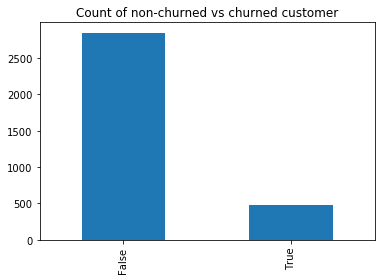

In [12]:
# plot of the churned vs non-churned customer numbers in the data

df.churn.value_counts().plot(kind='bar', title= 'Count of non-churned vs churned customer');

##### Check correlation among the variables:

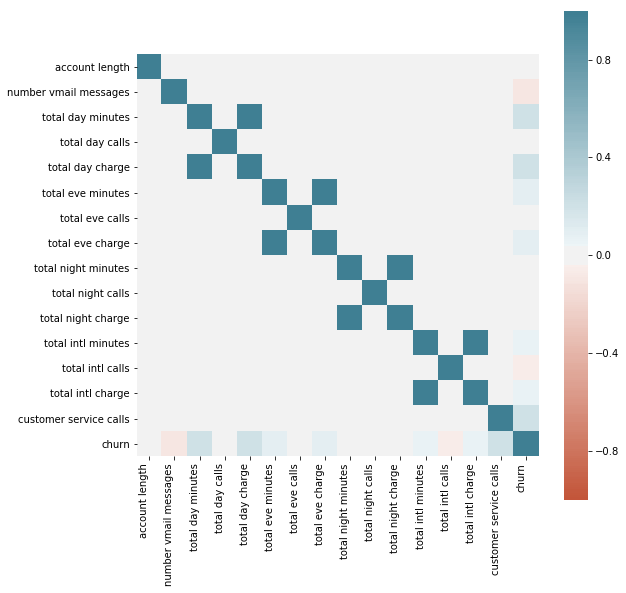

In [13]:
# Correlation among the variables

plt.figure(figsize=[9,9])

corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<font color='blue'>
    
_* The minutes and charges are strongly correlated._ 

_** Number of voice mail messages and total intl calls have a weak correlation with churn_ 

_*** Customer service calls have a weak correlation with churn._



</font>

##### Confirmation of strong correlation between minutes and charges:

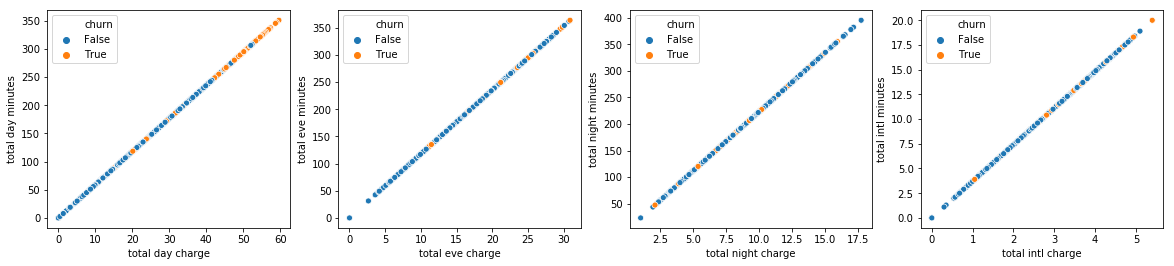

In [14]:
fig, axs = plt.subplots(ncols=4, figsize=[20,4])

sns.scatterplot(x='total day charge', y='total day minutes', hue = 'churn', data=df, ax=axs[0])

sns.scatterplot(x='total eve charge', y='total eve minutes', hue = 'churn', data=df, ax=axs[1])

sns.scatterplot(x='total night charge', y='total night minutes', hue = 'churn', data=df, ax=axs[2]);

sns.scatterplot(x='total intl charge', y='total intl minutes', hue = 'churn', data=df, ax=axs[3]);

<font color='blue'> _perfect correlation, charge/ minutes is constant in respective time segments. Going forward either 
or charges can be used for modelling._ </font>

#### Looking at the interaction among the variables in more details:

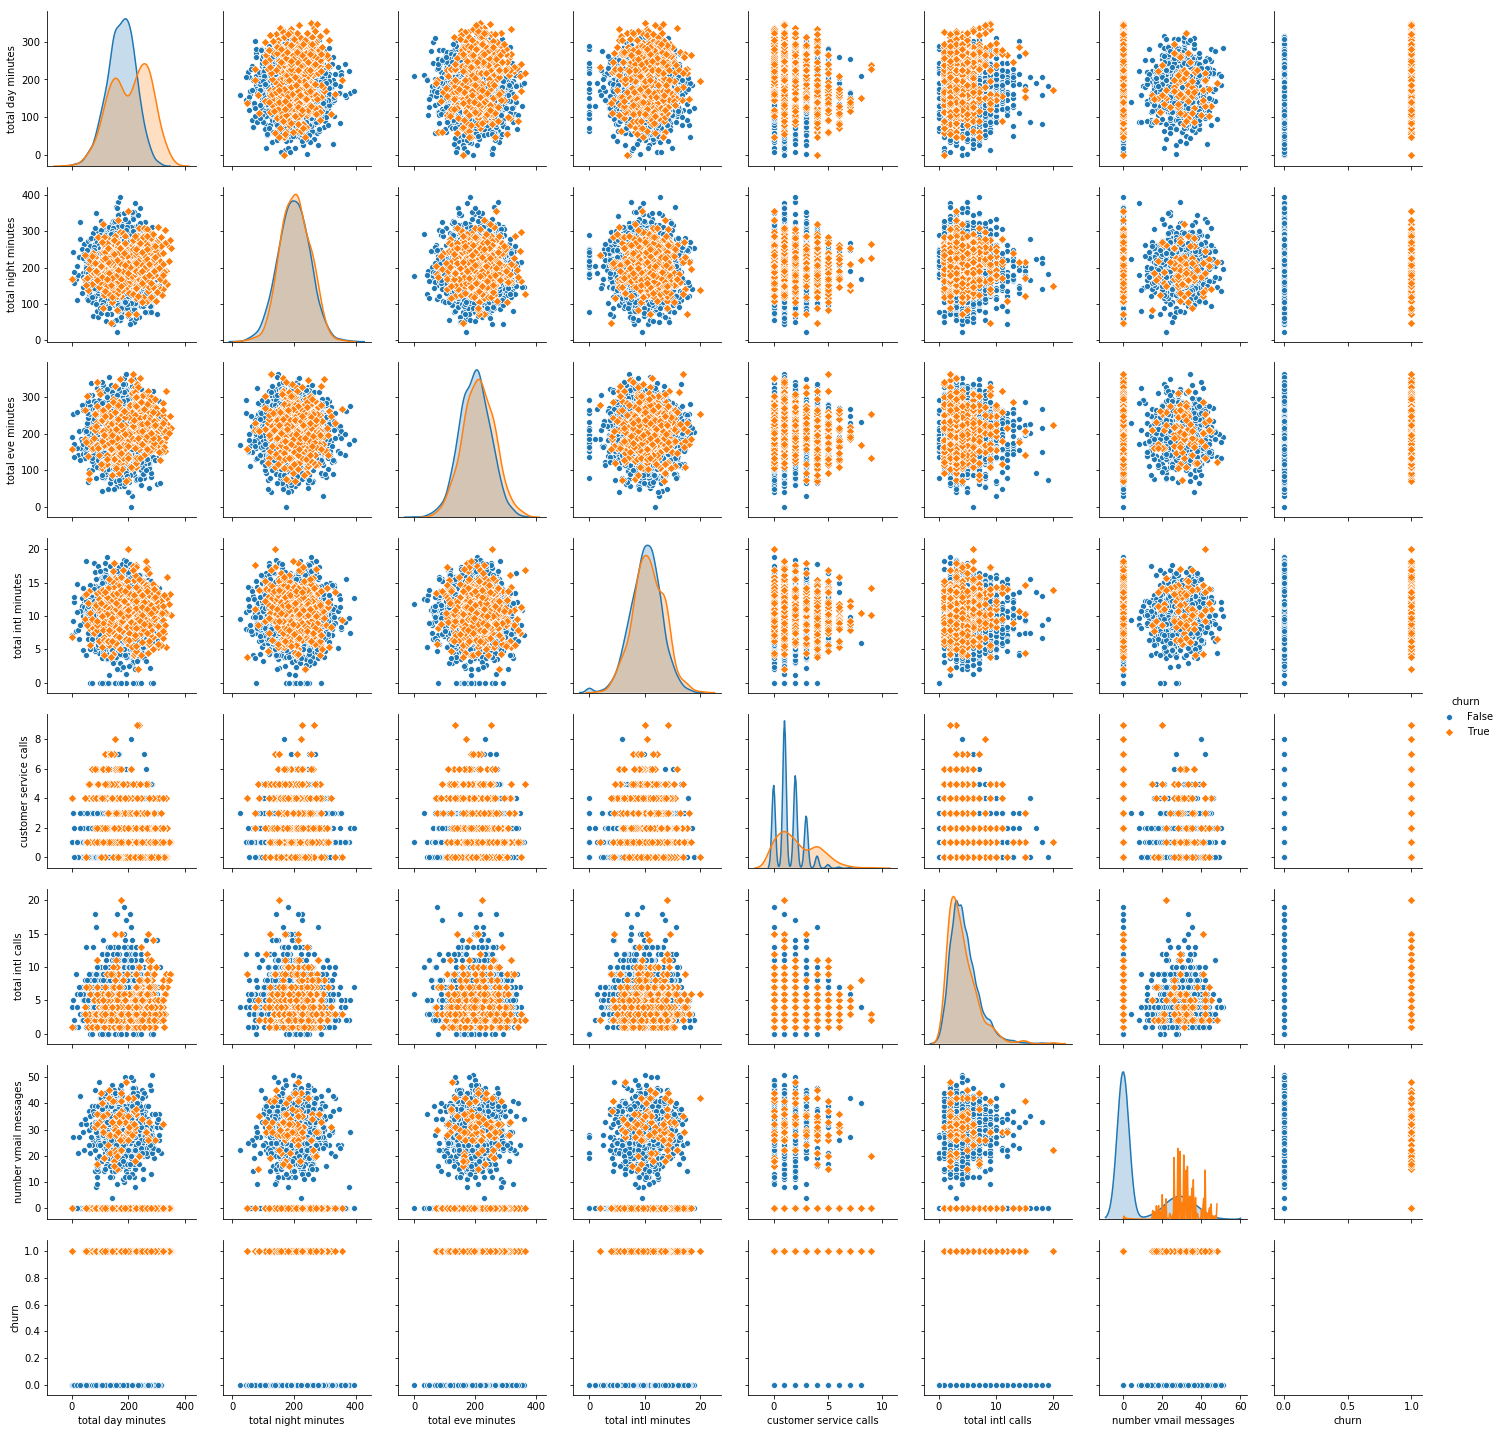

In [15]:
sns.pairplot(df[['total day minutes', 'total night minutes','total eve minutes','total intl minutes',\
                 
                 'customer service calls','total intl calls','number vmail messages','churn']],hue='churn', markers=['o', 'D']);

###### Customer service calls and total day minutes 

<font color='blue'> _Examine customer service calls:_ </font> 

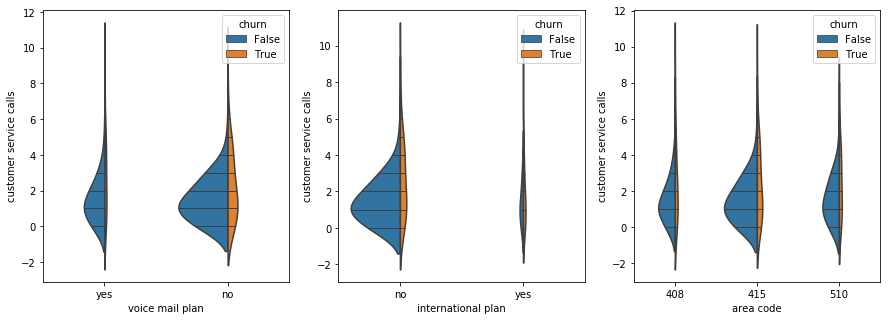

In [17]:
fig, axs = plt.subplots(ncols=3, figsize=[15,5])

sns.violinplot(x='voice mail plan', y='customer service calls', hue='churn', data=df, 
               inner='stick', scale='count', scale_hue=False, split=True, bw=0.6 , ax=axs[0])

sns.violinplot(x='international plan', y='customer service calls', hue='churn', data=df, 
               inner='stick', scale='count', scale_hue=False, split=True, bw=0.6 , ax=axs[1])

sns.violinplot(x='area code', y='customer service calls', hue='churn', data=df, 
               inner='stick', scale='count', scale_hue=False, split=True, bw=0.6 , ax=axs[2]);

In [18]:
df.groupby(['voice mail plan','churn']).agg({'churn':'count','customer service calls':'mean'})\
.rename(columns={'churn':'customer count','customer service calls':'avg_cust_serv_calls'}).reset_index()

,voice mail plan,churn,customer count,avg_cust_serv_calls
0,no,False,2008,1.460657
1,no,True,403,2.158809
2,yes,False,842,1.423990
3,yes,True,80,2.587500


<font color='blue'>
    
_* There seems to be higher ratio of churn among non voice mail plan subcriber._

_** Average customer service call numbers for churned customers are higher for both subcribers and non-subscribers of voice mail plan._

</font>

In [19]:
df.groupby(['international plan','churn']).agg({'churn':'count','customer service calls':'mean'})\
.rename(columns={'churn':'customer count','customer service calls':'avg_cust_serv_calls'}).reset_index()

,international plan,churn,customer count,avg_cust_serv_calls
0,no,False,2664,1.456081
1,no,True,346,2.476879
2,yes,False,186,1.360215
3,yes,True,137,1.605839


<font color='blue'> _*Ratio of churn is higher in the international plan subscribing group!!!_ </font>

----------------------------------------------------------------------------------------------------------------------------

<font color='blue'> _Examine Day minutes:_ </font>

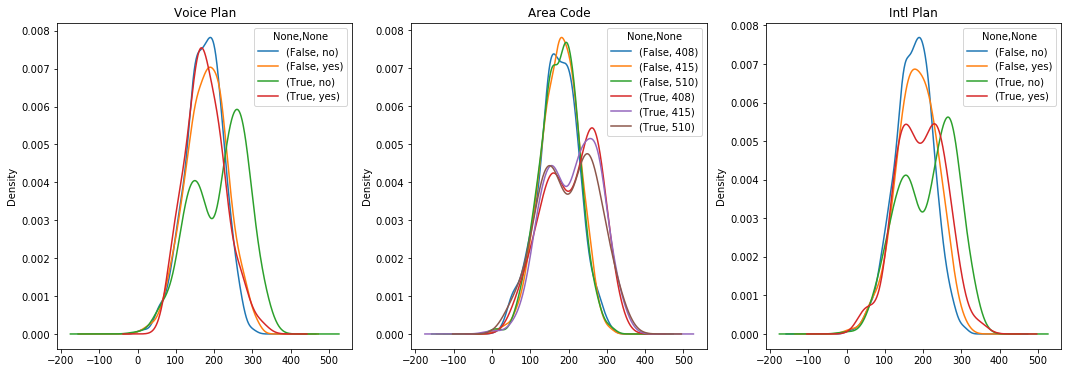

In [20]:
## Examine the bimodality from different perspective:

fig, axs = plt.subplots(ncols=3, figsize=[18,6])

df.groupby(['churn','voice mail plan'])['total day minutes'].plot(kind='kde',legend= True,ax=axs[0]);axs[0].set_title('Voice Plan')

df.groupby(['churn','area code'])['total day minutes'].plot(kind='kde',legend= True,ax=axs[1]);axs[1].set_title('Area Code')

df.groupby(['churn','international plan'])['total day minutes'].plot(kind='kde',legend= True,ax=axs[2]);axs[2].set_title('Intl Plan');

<font color='blue'> _* Most of the churned non-voice mail plan subscribers have higher day minutes._ <br>
_** Day minutes bi-modality is true for churned customers accross the different area codes too._ <br>
</font>

### Feature Engineering:

In [23]:
## Create average call duration columns for day, eve, night and intl

In [37]:
df['avg_day_call_duration'] = df['total day minutes']/df['total day calls']

df['avg_eve_call_duration'] = df['total eve minutes']/df['total eve calls']

df['avg_night_call_duration'] = df['total night minutes']/df['total night calls']

df['avg_intl_call_duration'] = df['total intl minutes']/df['total intl calls']

In [25]:
## Create total minutes column

In [39]:
df['total min'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

In [27]:
## Create day/eve/night minutes ratio columns  

In [40]:
df['day_min_ratio'] = df['total day minutes'] /df['total min']

df['eve_min_ratio'] = df['total eve minutes'] /df['total min']

df['night_min_ratio'] = df['total night minutes'] /df['total min']

In [29]:
## Create customer service calls per total minutes of usage by the customer 

In [43]:
df['cust_call_per_min_usage']=df['customer service calls']/df['total min']

In [31]:
## Create customer service calls per unit account length column

In [42]:
df['cust_call_per_length']=df['customer service calls']/df['account length']

#### Looking at the interaction among the new variables

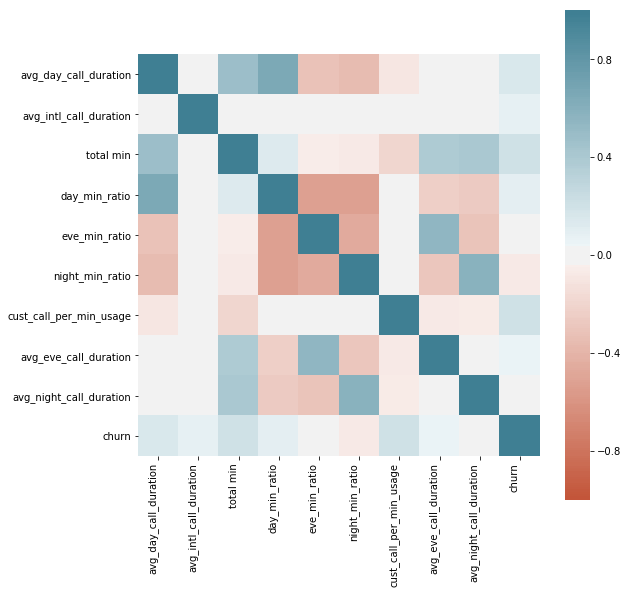

In [44]:
# Correlation among the variables

plt.figure(figsize=[9,9])

corr_1 = df[['avg_day_call_duration', 'avg_intl_call_duration', 'total min',\
       'day_min_ratio', 'eve_min_ratio', 'night_min_ratio', 'cust_call_per_min_usage', \
       'avg_eve_call_duration', 'avg_night_call_duration','churn']].corr()

ax = sns.heatmap(
    corr_1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<font color='blue'>

_* The avg duration variables are correlated with the ratio columns; dropping those duartion variables during modeling._ </font>


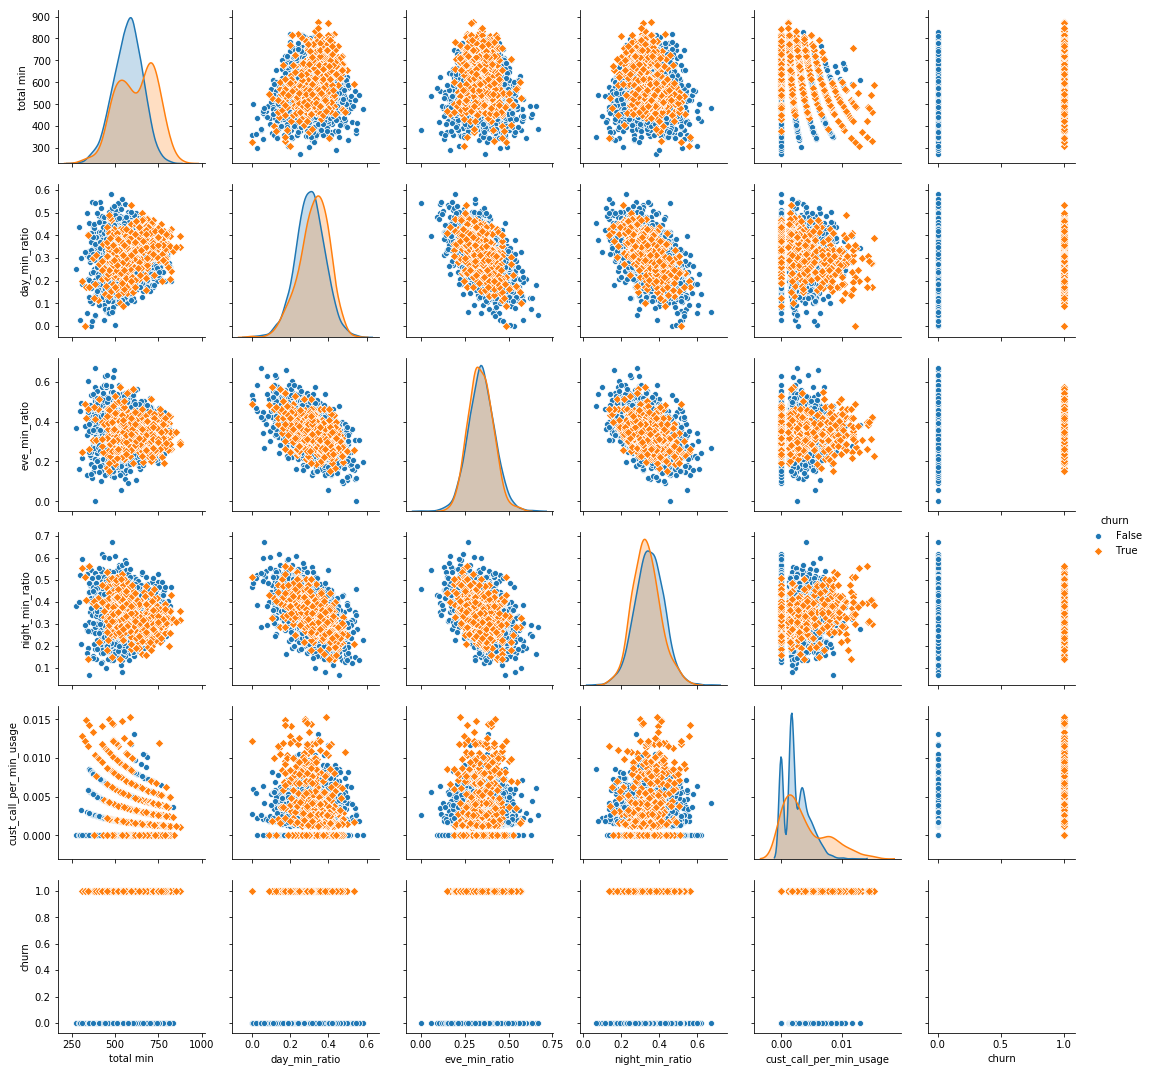

In [45]:
sns.pairplot(df[[ 'total min','day_min_ratio', 'eve_min_ratio', 'night_min_ratio', 'cust_call_per_min_usage', \
        'churn']],hue='churn', markers=['o', 'D']);

In [ ]:
## Final selection of variables 

In [47]:
df_model = df[['international plan','voice mail plan','account length','number vmail messages',\
               
       'total day minutes', 'total day calls','total eve minutes', 'total eve calls','total night minutes',\
               
        'total night calls','total intl minutes', 'total intl calls','customer service calls',\
               
        'total min', 'day_min_ratio', 'eve_min_ratio','night_min_ratio', 'cust_call_per_min_usage',\
               
               'cust_call_per_length','churn']]

### Model Building:

##### Change the categorial and booleans variables

In [50]:
## Turn voice mail plan and international plan to binary:

for c in df_model.columns:
    
    if df_model[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df_model[c].values))
        df_model[c] = lbl.transform(list(df_model[c].values))


In [60]:
## Turn True and False of churn to 1 and 0:

df_model['churn'] = df['churn'].apply(lambda x: 1 if x==True else 0)

In [61]:
df_model.head()

,international plan,voice mail plan,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,total min,day_min_ratio,eve_min_ratio,night_min_ratio,cust_call_per_min_usage,cust_call_per_length,churn
0,0,1,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,707.2,0.374859,0.279129,0.346012,0.001414,0.007812,0
1,0,1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,611.5,0.264268,0.319706,0.416026,0.001635,0.009346,0
2,0,0,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,527.2,0.461684,0.229894,0.308422,0.000000,0.000000,0
3,1,0,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,558.2,0.536367,0.110892,0.352741,0.003583,0.023810,0
4,1,0,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,501.9,0.332138,0.295477,0.372385,0.005977,0.040000,0


##### Predictor \ Target variable separation and split into train \ test:

In [64]:
## Get predictor and Target variable to X and y

X, y = df_model.iloc[:,:-1], df_model.iloc[:,-1]

In [65]:
# Create the training and test sets

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=123)

##### Instantiate xgb, build and test the model:

In [75]:
# Instantiate the XGBClassifier: xg_cl

xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20, max_depth=6,n_jobs=4,seed=123)

# Fit the classifier to the training set

xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds

preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.964018


##### Feature Importances:

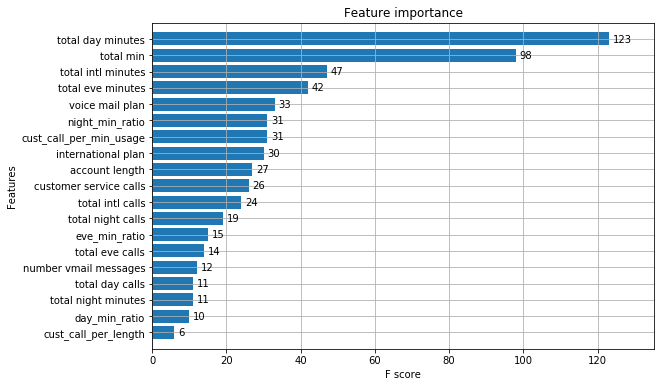

In [112]:
# plot the important features #
fig, ax = plt.subplots(figsize=(9,6))
xgb.plot_importance(xg_cl, height=0.8, ax=ax)
plt.show()

#### ROC Curve and Confusion Matrix:

<font color='blue'> _Confusion Matrix:_ </font>

In [113]:
conmat = np.array(confusion_matrix(y_test, preds, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['churn', 'not churned'],
                         columns=['predicted_churn','predicted_not_churned'])
confusion

,predicted_churn,predicted_not_churned
churn,79,16
not churned,8,564


<font color='blue'> _Accuracy, Precision and Recall:_ </font>

In [114]:
## Accuracy:

print("Accuracy is: {:.5}%".format((79+564)/(79+8+564+16)*100))

print("_ _"*10)

## Precision:

print("Precision is: {:.5}%".format((79)/(79+8)*100))

print("_ _"*10)

## Recall or Sensitvity:

print("Recall\ Sensitivity is: {:.5}%".format((79)/(79+16)*100))

print("_ _"*10)


Accuracy is: 96.402%
_ __ __ __ __ __ __ __ __ __ _
Precision is: 90.805%
_ __ __ __ __ __ __ __ __ __ _
Recall\ Sensitivity is: 83.158%
_ __ __ __ __ __ __ __ __ __ _


<font color='blue'> _ROC Plot:_ </font>

In [82]:
yhat_pp = xg_cl.predict_proba(X_test)

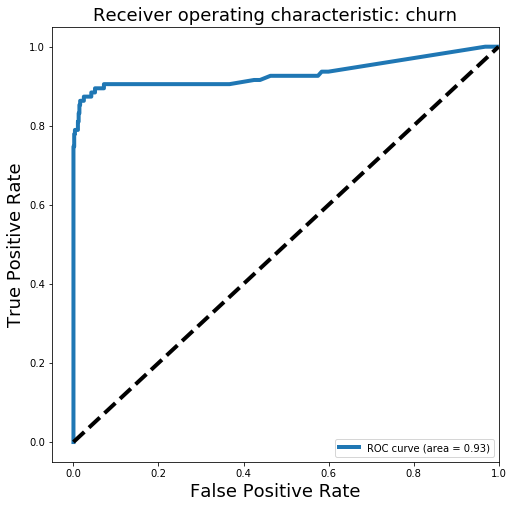

In [88]:
fpr, tpr, _ = roc_curve(y_test, yhat_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: churn', fontsize=18)
plt.legend(loc="lower right")
plt.show()